In [13]:

import numpy as np
import pandas as pd
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.core import Lattice, Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

In [14]:
mp_key = "jkj1S0TLmQtlvQmGDoUQvq5XQzLfKlCF"
mp_id = "mp-14437"

In [15]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)

In [27]:
spaceAnalyzer = SpacegroupAnalyzer(prim_struc)
data = spaceAnalyzer.get_primitive_standard_structure()
data2 = spaceAnalyzer.get_conventional_standard_structure()
print (data)
print ("\n")
print (data2)

Full Formula (Rb1 Y1 O2)
Reduced Formula: RbYO2
abc   :   6.812171   6.812171   6.812171
angles:  29.609263  29.609263  29.609263
pbc   :       True       True       True
Sites (4)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Rb    0         0         0
  1  Y     0.5       0.5       0.5
  2  O     0.774706  0.774706  0.774706
  3  O     0.225294  0.225294  0.225294


Full Formula (Rb3 Y3 O6)
Reduced Formula: RbYO2
abc   :   3.481345   3.481345  19.526693
angles:  90.000000  90.000000 120.000000
pbc   :       True       True       True
Sites (12)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Rb    0         0         0
  1  Rb    0.666667  0.333333  0.333333
  2  Rb    0.333333  0.666667  0.666667
  3  Y     0.333333  0.666667  0.166667
  4  Y     1         1         0.5
  5  Y     0.666667  0.333333  0.833333
  6  O     0.666667  0.333333  0.10804
  7  O     0         0         0.225294
  8  O     0.333333 

In [28]:
type_de_maille  = spaceAnalyzer.get_lattice_type()
print("type_de_maille =",str(type_de_maille))

crystal_systeme = spaceAnalyzer.get_crystal_system()
print("cristal systeme =",str(crystal_systeme))

groupe = spaceAnalyzer.get_point_group_symbol()
print("groupe ponctuel =",str(groupe))


type_de_maille = rhombohedral
cristal systeme = trigonal
groupe ponctuel = -3m


In [18]:

direct_Network = data.lattice

print(direct_Network.matrix)

direct_Network2 = data2.lattice

print(direct_Network2.matrix)


Vecteurs du réseau direct maille primitive :
[[ 4.79852312e-18  2.00995545e+00  6.50889751e+00]
 [ 1.74067248e+00 -1.00497772e+00  6.50889751e+00]
 [-1.74067248e+00 -1.00497772e+00  6.50889751e+00]]
Vecteurs du réseau direct maille conventionnelle :
[[ 1.74067248 -3.01493317  0.        ]
 [ 1.74067248  3.01493317  0.        ]
 [ 0.          0.         19.52669252]]


In [31]:

reciprocal_Network = data.lattice.reciprocal_lattice
print(reciprocal_Network.matrix)
reciprocal_Network2 = data2.lattice.reciprocal_lattice
print(reciprocal_Network2.matrix)


[[ 4.00749543e-16  2.08402142e+00  3.21774171e-01]
 [ 1.80481549e+00 -1.04201071e+00  3.21774171e-01]
 [-1.80481549e+00 -1.04201071e+00  3.21774171e-01]]
[[ 1.80481549 -1.04201071  0.        ]
 [ 1.80481549  1.04201071  0.        ]
 [ 0.          0.          0.32177417]]



---- Informations cristallographiques ----
Type de maille          : rhombohedral
Système cristallin      : trigonal
Groupe ponctuel         : -3m

---- Direct (Maille Primitive) ----
Vecteur a               : [4.79852312e-18 2.00995545e+00 6.50889751e+00]
Vecteur b               : [ 1.74067248 -1.00497772  6.50889751]
Vecteur c               : [-1.74067248 -1.00497772  6.50889751]
Longueurs (a, b, c)     : (6.812170554452989, 6.812170554452989, 6.812170554452989)
Angles (α, β, γ)       : (29.60926334738943, 29.60926334738943, 29.60926334738943)

---- Réciproque (Maille Primitive) ----
Vecteur a               : [4.00749543e-16 2.08402142e+00 3.21774171e-01]
Vecteur b               : [ 1.80481549 -1.04201071  0.32177417]
Vecteur c               : [-1.80481549 -1.04201071  0.32177417]
Longueurs (a, b, c)     : (2.1087161732780295, 2.1087161732780295, 2.108716173278029)
Angles (α, β, γ)       : (117.71496699844091, 117.71496699844091, 117.7149669984409)

---- Direct (Maille Conventionnel

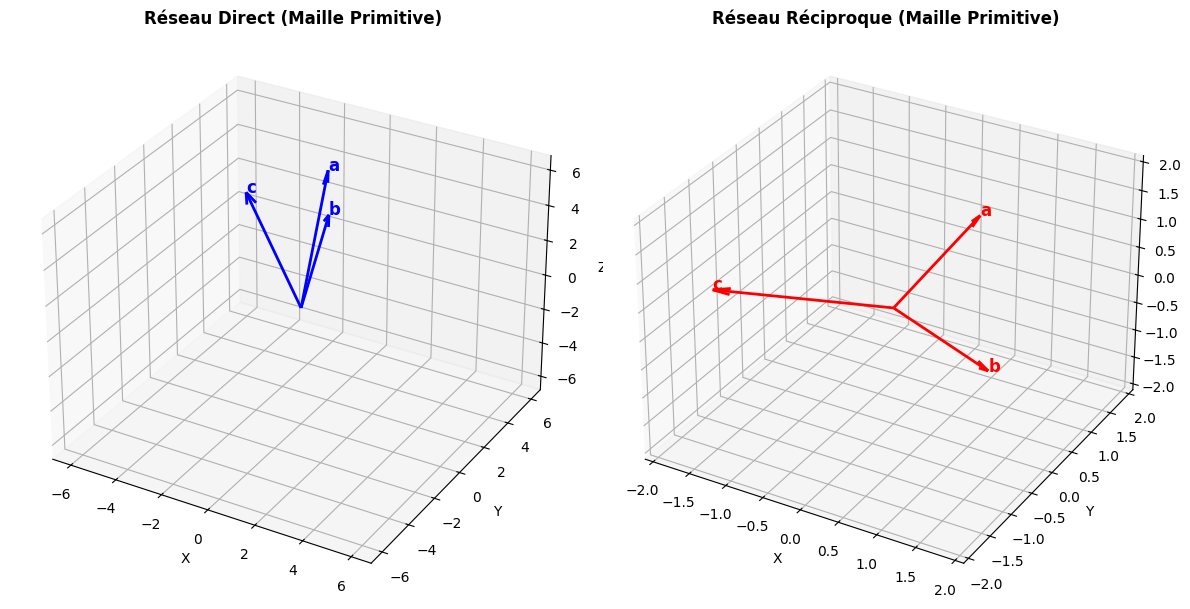

In [30]:
données =  [
    ("----Informations cristallographiques----", ""),
    ("Type de maille", type_de_maille),
    ("Système cristallin", crystal_systeme),
    ("Groupe ponctuel", groupe),
    ("", ""),
    ("-------Maille primitive-------", ""),
    ("----Réseau direct----", ""),
    ("Vecteur a", direct_Network.matrix[0]),
    ("Vecteur b", direct_Network.matrix[1]),
    ("Vecteur c", direct_Network.matrix[2]),
    ("Longueurs (a, b, c)", direct_Network.abc),
    ("Angles (α, β, γ)", direct_Network.angles),
    ("", ""),
    ("----Réseau réciproque----", ""),
    ("Vecteur a*", reciprocal_Network.matrix[0]),
    ("Vecteur b*", reciprocal_Network.matrix[1]),
    ("Vecteur c*", reciprocal_Network.matrix[2]),
    ("Longueurs (a*, b*, c*)", reciprocal_Network.abc),
    ("Angles (α*, β*, γ*)", reciprocal_Network.angles),
    ("", ""),
    ("-------Maille conventionnelle-------",""),
    ("----Réseau direct----", ""),
    ("Vecteur a", direct_Network2.matrix[0]),
    ("Vecteur b", direct_Network2.matrix[1]),
    ("Vecteur c", direct_Network2.matrix[2]),
    ("Longueurs (a, b, c)", direct_Network2.abc),
    ("Angles (α, β, γ)", direct_Network2.angles),
    ("", ""),
    ("----Réseau réciproque----", ""),
    ("Vecteur a*", reciprocal_Network2.matrix[0]),
    ("Vecteur b*", reciprocal_Network2.matrix[1]),
    ("Vecteur c*", reciprocal_Network2.matrix[2]),
    ("Longueurs (a*, b*, c*)", reciprocal_Network2.abc),
    ("Angles (α*, β*, γ*)", reciprocal_Network2.angles),
    
]
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Données des réseaux ---
reseaux = {
    "Direct (Maille Primitive)": direct_Network,
    "Réciproque (Maille Primitive)": reciprocal_Network,
    "Direct (Maille Conventionnelle)": direct_Network2,
    "Réciproque (Maille Conventionnelle)": reciprocal_Network2,
}

# --- Affichage des informations cristallographiques ---
print("\n---- Informations cristallographiques ----")
print(f"Type de maille          : {type_de_maille}")
print(f"Système cristallin      : {crystal_systeme}")
print(f"Groupe ponctuel         : {groupe}")

for nom, network in reseaux.items():
    print(f"\n---- {nom} ----")
    print(f"Vecteur a               : {network.matrix[0]}")
    print(f"Vecteur b               : {network.matrix[1]}")
    print(f"Vecteur c               : {network.matrix[2]}")
    print(f"Longueurs (a, b, c)     : {network.abc}")
    print(f"Angles (α, β, γ)       : {network.angles}")

# --- Fonction pour afficher un réseau ---
def plot_reseau(ax, network, title, color):
    origin = np.array([0, 0, 0])
    vectors = np.array([network.matrix[0], network.matrix[1], network.matrix[2]])

    for vec, label in zip(vectors, ['a', 'b', 'c']):
        ax.quiver(*origin, *vec, color=color, linewidth=2, arrow_length_ratio=0.1)
        ax.text(*vec, label, color=color, fontsize=12, weight='bold')

    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim([-max(network.abc), max(network.abc)])
    ax.set_ylim([-max(network.abc), max(network.abc)])
    ax.set_zlim([-max(network.abc), max(network.abc)])
    ax.grid(True)

# --- Création des figures ---
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
plot_reseau(ax1, direct_Network, "Réseau Direct (Maille Primitive)", "blue")

ax2 = fig.add_subplot(122, projection='3d')
plot_reseau(ax2, reciprocal_Network, "Réseau Réciproque (Maille Primitive)", "red")

plt.tight_layout()
plt.show()

